#Кластеризация k-means

Кластеры k-means используются для разделения набора данных на группы (кластеры). Зачем это нужно? Алгорит k-means может найти или даже лучше сказать "почувствовать" неочевидные на первый взгляд группировки точек данных, далее эти группы можно использовать для поиска каких-либо закономерностей. В данной статье я расскажу, как работает этот алгоритм и визуализирую его.

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from IPython import display
import time
import random
%matplotlib inline

Начну сразу с практического применения. Создадим рандомный дата-сет для кластеризации, используя make_blobs из sklearn.

In [2]:
X, y = make_blobs(n_features=2, centers=3,cluster_std=1.3,random_state=7)
df = pd.DataFrame({'x':X[:, 0],'y':X[:, 1]})
df.head()

,x,y
0,-8.864086,4.064399
1,8.337427,0.599259
2,-9.439154,6.992587
3,-8.474992,3.317234
4,7.778973,1.720418


Посмотрим, как он выглядит графически.

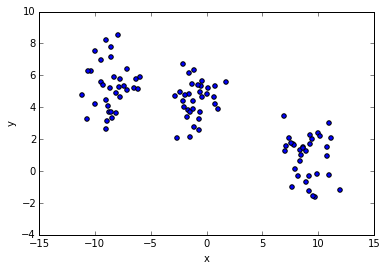

In [3]:
df.plot(kind='scatter',x='x',y='y')

На картинке видно, что в этом дата-сете может быть 3 кластера. Алгоритм k-means сам не может определить кол-во кластеров - его должен предложить человек. И так, как же работает k-means?

1. Рандомно выставляем k точек (центроидов), которые являются центрами каждого кластера.
2. Находим для каждой точки ближайший кластер. Для этого используюетя какая-либо мера расстояния. Я буду использовать Евклидово расстояние.
3. Перемещаем центр каждого кластера в средную точку всех точек определенных для кластера.
4. Повторяем действия 2 и 3 пока центроиды не перестанут перемещаться.

Я так же сразу добавлю код, который будет визуализировать перемещение центроидов (в этой функции разные цвета точек буду присваиться только трем первым кластерам).

In [4]:
def euclidean(x,y):
    return np.linalg.norm(x-y)

def kmeans_clust(df, k, iters=100, distance = euclidean,plot=False):
    # определить min, max по каждой переменной
    min_max = [(df[col].min(),df[col].max()) for col in df.columns]

    # рандомно выставить центроиды внутри диапазона min-max
    random.seed(3)
    centroinds = np.array([[random.uniform(r[0], r[1]) 
                            for r in min_max] for j in range(k)])
    
    def nearest_centroid(df,centroids,distance):
        '''Определяет ближайший к точке центроид'''
        dist = []
        for centroid in centroids:
            dist.append(distance(df.values,centroid))
        return dist.index(min(dist))
    
    for i in range(iters):
        # назначить каждой точке ближайший кластер
        clusters = df.apply(nearest_centroid,axis=1,args=(centroinds,euclidean))
        
        # визуализируем, если есть флаг
        if plot:
            plt.clf() # очищает вывод pyplot
            color = np.select([clusters == 0, clusters == 1,clusters == 2],['r','g','b'],'m')
            plt.scatter(df.x,df.y,c=color)
            plt.scatter(centroinds[:,0],centroinds[:,1],marker='x', s=169, linewidths=3,
                color='r', zorder=10)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(.5)
        
        # если центроиды не изменились - значит решение найдено
        if (centroinds == df.groupby(clusters).mean().values).any():
            break
            
        # пересчитываем центроиды как среднее всех точек    
        centroinds = df.groupby(clusters).mean().values
        
    return clusters, centroinds

Определим кластеры для нашего дата-сета.

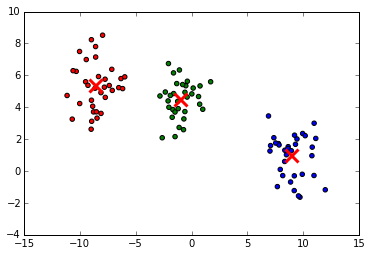

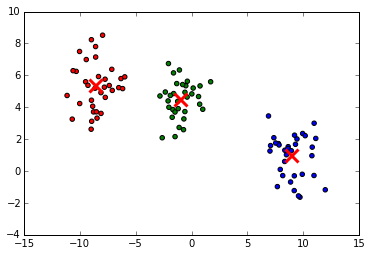

In [5]:
clusters, centroinds = kmeans_clust(df,k=3,plot=True)

Мой алгоритм справился с задачей и отлично определил три кластера. Елси вы запустите предыдущую ячейку у себя на компьютере, то на диаграмме увидите, как перемещаются центроиды. Теперь попробуем сгенерить еще один рандомный сет и проверим алгоритм на нем.

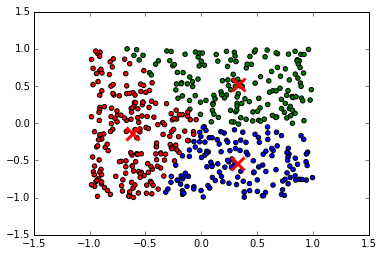

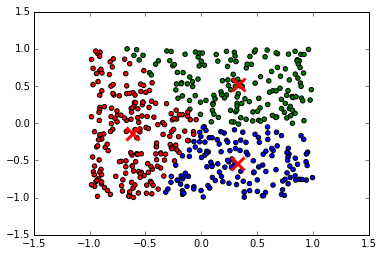

In [6]:
x2 = np.array([(np.random.uniform(-1, 1), np.random.uniform(-1, 1)) for i in range(500)])
df1 = pd.DataFrame({'x':x2[:, 0],'y':x2[:, 1]})
clusters, centroinds = kmeans_clust(df1,3,50,plot=True)

В данном случае алгоритм разделил дата-сет на три равные части, т.к. для случайных данных было задано равномерное распределение. Давайте запустим k-means с 4 кластрерами и посмотрим, что получится.

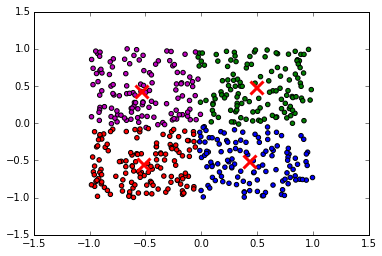

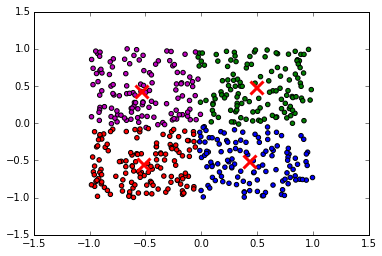

In [7]:
clusters, centroinds = kmeans_clust(df1,4,50,plot=True)

Получилось 4 равные части - что и следовало ожидать.

Естественно этот k-means реализованы в sklearn. Проверим как он работает.

In [8]:
clust = KMeans(n_clusters=3)
clust.fit(df[['x','y']])
centers = clust.cluster_centers_

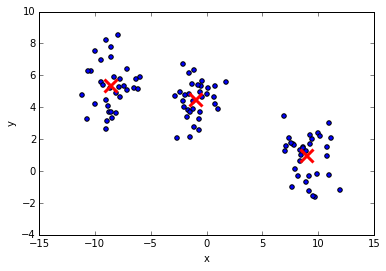

In [9]:
df.plot(kind='scatter',x='x',y='y')
plt.scatter(centers[:,0],centers[:,1],marker='x', s=169, linewidths=3,
            color='r', zorder=10)

Надеюсь эта статья помогла вам лучше понять, как работает k-means кластеризация.